# Autors : Ziba, Elham-de, and Elham-ca

## Data Preprocessing 

## 1) Exploratory Data Analysis

In [85]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd


df = pd.read_csv('C:/Users/Elham/Documents/DATA SCIENCE Training/LEVEL2_Intermediate/Session06/Session06-20210222T000337Z-001/Session06/Ex06/heart.csv')

Numerical = ['age','trestbps','chol','thalach','oldpeak','slope','ca','target']
df_N = df.loc[:, Numerical]

Categorical = ['sex','cp','fbs','restecg','exang','thal','target']
df_C = df.loc[:, Categorical]

print('\n'"*** ↑↑↑ Data Info: ↑↑↑ ***"'\n''\n', df.info())

print('\n'"*** ↓↓↓ Numerical Data Description: ↓↓↓ ***"'\n''\n', df_N.describe())

print('\n'"*** ↓↓↓ Categorical Data Description: ↓↓↓ ***"'\n''\n', df_C.describe())

# NAN ************************************************************************

print('\n'"*** ↓↓↓ NAN Data: ↓↓↓ ***"'\n''\n',df.isnull().sum())


# Outliers *******************************************************************

df_num = df.iloc[:,[2,4,6,7,8]]
for k, v in df_num.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df_num)[0]
    print("*** ➞ Column %s outliers = %.2f%%" % (k, perc))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB

*** ↑↑↑ Data Info: ↑↑↑ ***

 None

*** ↓↓↓ Numerical Data Description: ↓↓↓ ***

               age    trestbps        chol     thalach     oldpeak       slope  \
count  303.000000  303.000000  303.000000  303.000000  3

## 2) Data Visualization 

In [7]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

### 2-1) Pair Plot for Numeric Data

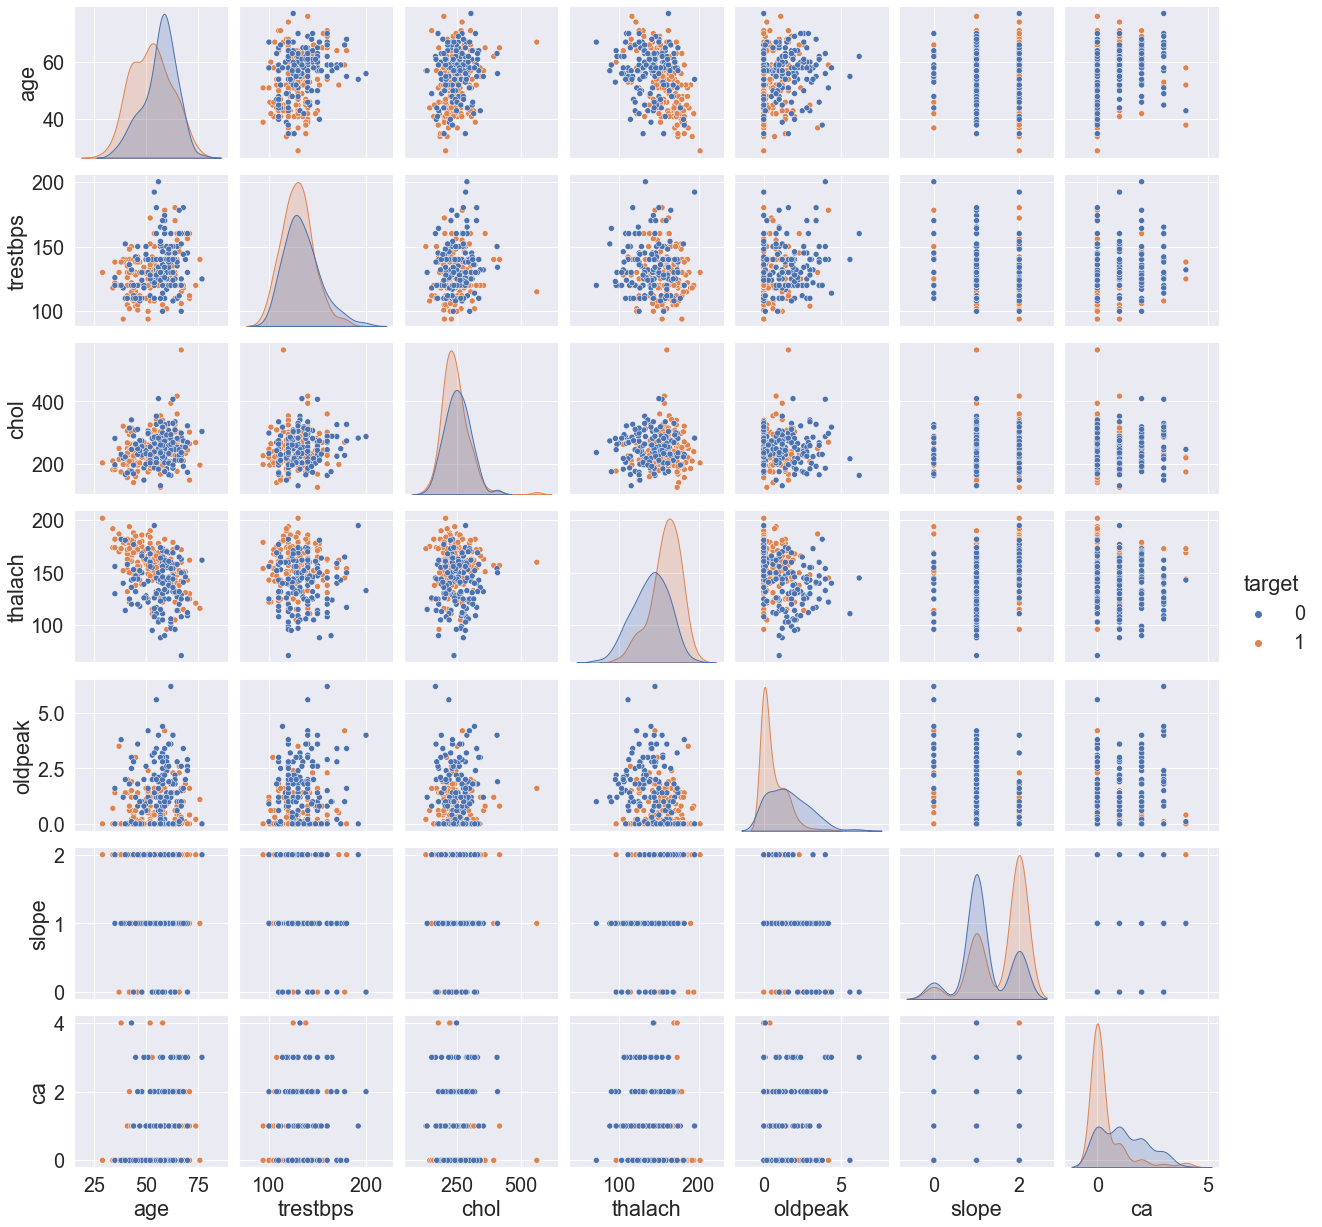

In [63]:
# Pair Plot for Numeric Data***************************************************

sns.pairplot(df_N,hue='target')


### 2-2) Pearson Corr Heat Map with p_values (%95) 

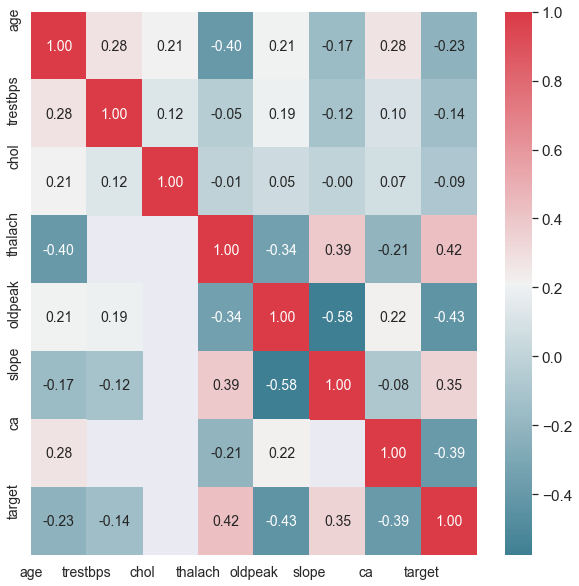


*** p_values (%95): ***

 [[0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.4 0.  0.  0.1 0. ]
 [0.  0.  0.  0.9 0.3 0.9 0.2 0.1]
 [0.  0.4 0.9 0.  0.  0.  0.  0. ]
 [0.  0.  0.3 0.  0.  0.  0.  0. ]
 [0.  0.  0.9 0.  0.  0.  0.2 0. ]
 [0.  0.1 0.2 0.  0.  0.2 0.  0. ]
 [0.  0.  0.1 0.  0.  0.  0.  0. ]]

*** Correlation: ***

            age   sex    cp  trestbps  chol   fbs  restecg  thalach  exang  \
age       1.00 -0.10 -0.07      0.28  0.21  0.12    -0.12    -0.40   0.10   
sex      -0.10  1.00 -0.05     -0.06 -0.20  0.05    -0.06    -0.04   0.14   
cp       -0.07 -0.05  1.00      0.05 -0.08  0.09     0.04     0.30  -0.39   
trestbps  0.28 -0.06  0.05      1.00  0.12  0.18    -0.11    -0.05   0.07   
chol      0.21 -0.20 -0.08      0.12  1.00  0.01    -0.15    -0.01   0.07   
fbs       0.12  0.05  0.09      0.18  0.01  1.00    -0.08    -0.01   0.03   
restecg  -0.12 -0.06  0.04     -0.11 -0.15 -0.08     1.00     0.04  -0.07   
thalach  -0.40 -0.04  0.30     -0.05 -0.01 -0.01    

In [89]:
# Pearson Corr Heat Map with p_values (%95) ***********************************

def corr_sig(df=None):
    p_matrix = np.zeros(shape=(df_N.shape[1],df_N.shape[1]))
    for col in df_N.columns:
        for col2 in df_N.drop(col,axis=1).columns:
            _ , p = stats.pearsonr(df[col],df[col2])
            p_matrix[df_N.columns.to_list().index(col),df_N.columns.to_list().index(col2)] = p
    return p_matrix

p_values = corr_sig(df_N)
mask = np.invert(np.tril(p_values<0.05))
mask[np.triu_indices_from(mask)] = False

corr = df_N.corr()
fig, ax = plt.subplots(figsize=(10, 10))

sns.set(font_scale = 1.4)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, mask=mask, annot=True, fmt=".2f", annot_kws={"size":14})
plt.xticks(range(len(corr.columns)), corr.columns, size = 14);
plt.yticks(range(len(corr.columns)), corr.columns, size = 14)
plt.show()

print('\n'"*** p_values (%95): ***"'\n''\n',p_values.round(1))
print('\n'"*** Correlation: ***"'\n''\n',df.corr().round(2))


### 2-3) Box Plot & Distribution Plots for Numeric Data 

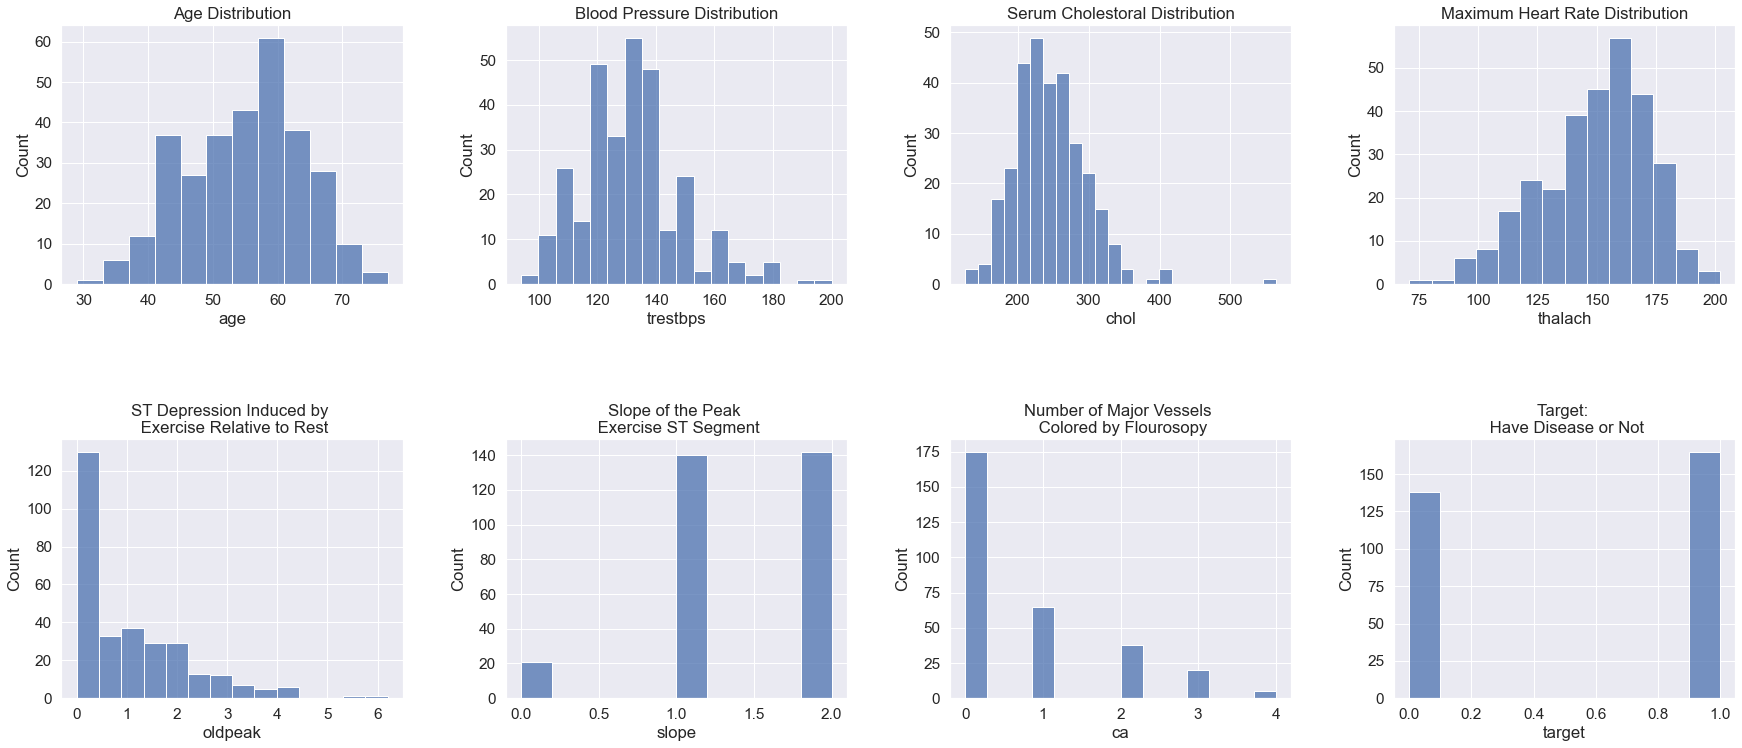

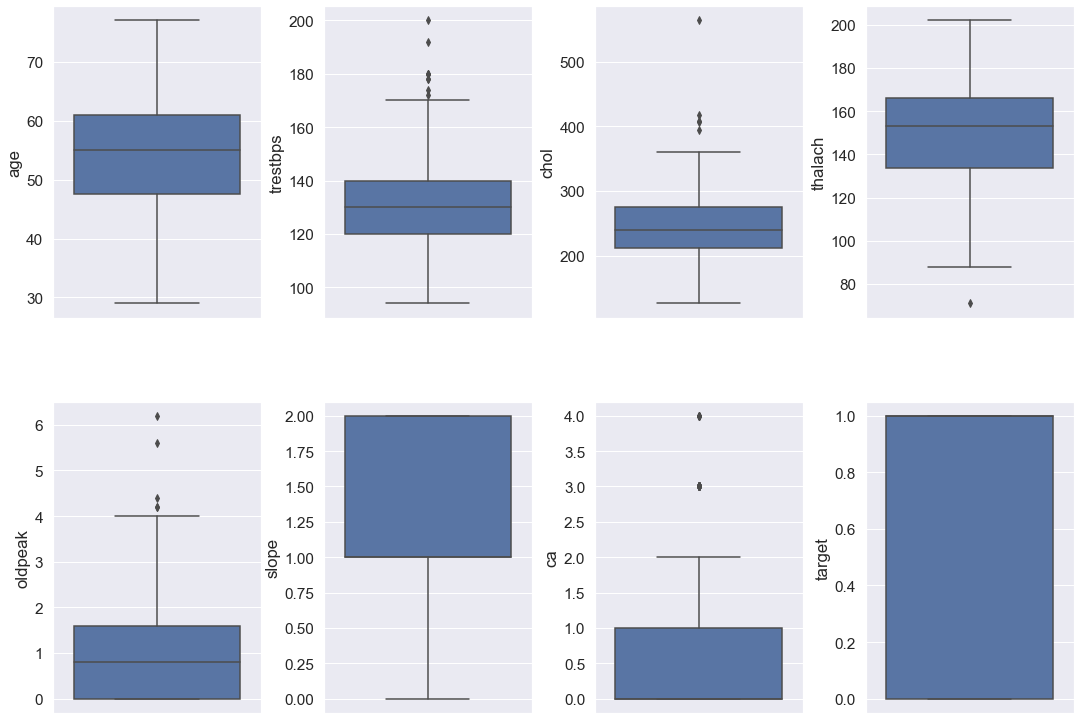

In [90]:
# Histogram for Numeric Data***************************************************

plt.figure(figsize=(30,20))
plt.subplots_adjust(hspace = 0.6)
plt.subplots_adjust(wspace = 0.3)

plt.subplot(3,4,1)
plt.title('Age Distribution')
sns.histplot(df_N.age)

plt.subplot(3,4,2)
plt.title('Blood Pressure Distribution')
sns.histplot(df_N.trestbps)

plt.subplot(3,4,3)
plt.title('Serum Cholestoral Distribution')
sns.histplot(df_N.chol)

plt.subplot(3,4,4)
plt.title('Maximum Heart Rate Distribution')
sns.histplot(df_N.thalach)

plt.subplot(3,4,5)
plt.title('ST Depression Induced by \n Exercise Relative to Rest')
sns.histplot(df_N.oldpeak)

plt.subplot(3,4,6)
plt.title('Slope of the Peak \n Exercise ST Segment')
sns.histplot(df_N.slope)

plt.subplot(3,4,7)
plt.title('Number of Major Vessels \n Colored by Flourosopy')
sns.histplot(df_N.ca)

plt.subplot(3,4,8)
plt.title('Target: \n Have Disease or Not')
sns.histplot(df_N.target)

plt.show()


# Box Plot ********************************************************************

fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(15, 10))
index = 0
axs = axs.flatten()
for k,v in df_N.items():
    sns.boxplot(y=k, data=df_N, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


### 2-4) Pair Distribution Plots for Numeric Data 

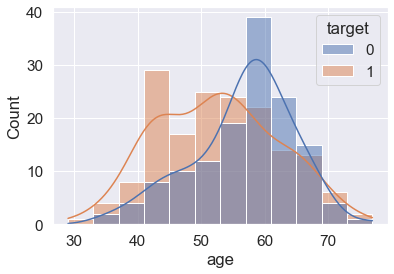

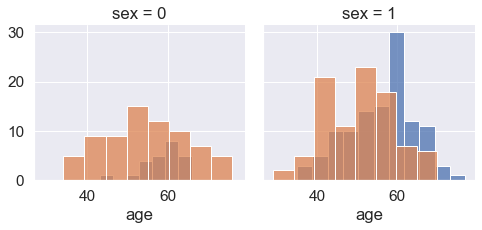

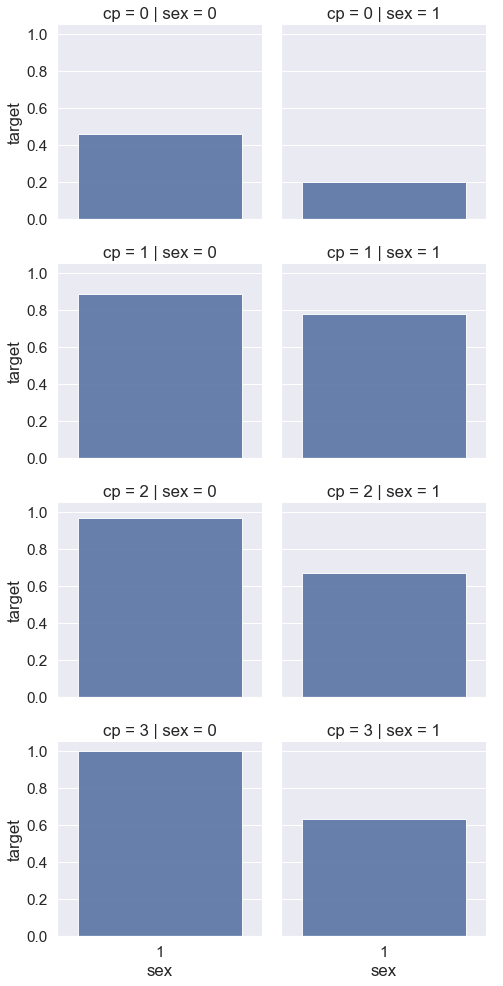

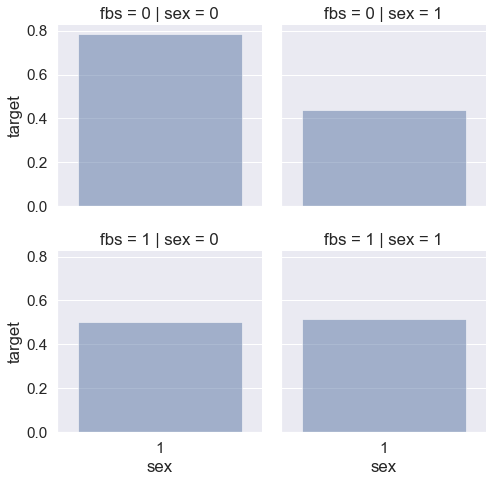

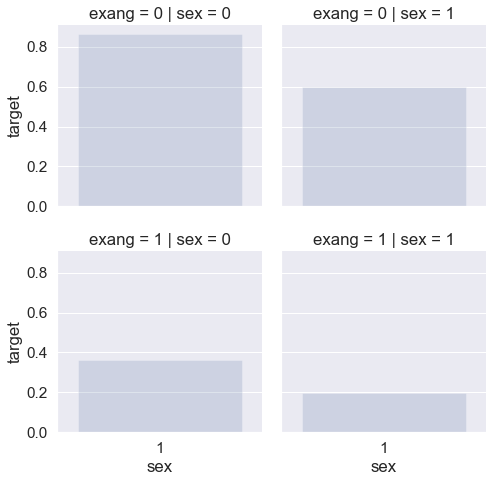

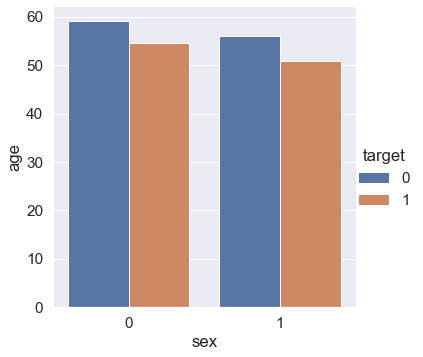

In [92]:
sns.set(font_scale = 1.4)

sns.histplot(df, x="age", hue="target",kde=True)


a = sns.FacetGrid(df, col='sex',hue='target', height=3.5, aspect=1)
a.map(sns.histplot, 'age')

b = sns.FacetGrid(df, row='cp',col='sex', height=3.5, aspect=1)
b.map(sns.barplot, 'sex', 'target', order=None, alpha=.9, ci=None)
b.add_legend()

c = sns.FacetGrid(df, row='fbs',col='sex', height=3.5, aspect=1)
c.map(sns.barplot, 'sex', 'target', order=None, alpha=.5, ci=None)
c.add_legend()

d = sns.FacetGrid(df, row='exang',col='sex', height=3.5, aspect=1)
d.map(sns.barplot, 'sex', 'target', order=None, alpha=.2, ci=None)
d.add_legend()

e = sns.catplot(kind = 'bar', data = df, y = 'age', x = 'sex', hue = 'target', ci=None)
plt.show(e)

In [93]:

print(df[['sex', 'target']].groupby(
    ['sex'], as_index=False).mean().sort_values(by='target', ascending=False))
print()
print(df[['cp', 'target']].groupby(
    ['cp'], as_index=False).mean().sort_values(by='target', ascending=False))
print()
print(df[["fbs", "target"]].groupby(
    ['fbs'], as_index=False).mean().sort_values(by='target', ascending=False))
print()
print(df[["restecg", "target"]].groupby(
    ['restecg'], as_index=False).mean().sort_values(by='target', ascending=False))
print()
print(df[["exang", "target"]].groupby(
    ['exang'], as_index=False).mean().sort_values(by='target', ascending=False))
print()
print(df[["slope", "target"]].groupby(
    ['slope'], as_index=False).mean().sort_values(by='target', ascending=False))
print()
print(df[["ca", "target"]].groupby(
    ['ca'], as_index=False).mean().sort_values(by='target', ascending=False))
print()
print(df[["thal", "target"]].groupby(
    ['thal'], as_index=False).mean().sort_values(by='target', ascending=False))
print()

   sex    target
0    0  0.750000
1    1  0.449275

   cp    target
1   1  0.820000
2   2  0.793103
3   3  0.695652
0   0  0.272727

   fbs    target
0    0  0.550388
1    1  0.511111

   restecg    target
1        1  0.631579
0        0  0.462585
2        2  0.250000

   exang    target
0      0  0.696078
1      1  0.232323

   slope    target
2      2  0.753521
0      0  0.428571
1      1  0.350000

   ca    target
4   4  0.800000
0   0  0.742857
1   1  0.323077
2   2  0.184211
3   3  0.150000

   thal    target
2     2  0.783133
0     0  0.500000
1     1  0.333333
3     3  0.239316



## Classification Analysis

### 1) Encoding Categorical Data

In [68]:
# Method (1), One Hot Encoder *******************************************************************

import category_encoders as ce
encoder=ce.OneHotEncoder(cols=('cp','restecg','thal'),handle_unknown='return_nan', return_df=True, use_cat_names=True)
df_C_encoded = encoder.fit_transform(df_C)
list(df_C_encoded.columns) 
# A question for Mohammad: Do we need to encode the categorical columns with (0,1) values e.g. sex, fbs, target, exang as well?

df_New = pd.concat([df_C_encoded, df_N], axis=1)
df_New = df_New.iloc[:, :-1]  # Removing repeated target column from the tail of data frame


# Method (2), Dummy Coding **********************************************************************

#df_dict={}
#df1=pd.get_dummies(df_C)
#df_dict['df1']=df1
#df_dict


### 2) Skewness for Non-Gaussian Data &  Splitting Dataset into the Training-set and Test-set

In [69]:
for col in df_New.columns:
    if np.abs(df_New[col].skew()) > 0.3:
        df_New[col] = np.log1p(df_New[col])

X=df_New.drop(columns = ['target']).values
y=df_New[['target']].values.ravel()


#Splitting Dataset into the Training-set and Test-set**********************************************

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)


Shape of X_train:  (212, 21)
Shape of X_test:  (91, 21)
Shape of y_train:  (212,)
Shape of y_test (91,)


### 3) Normalization & Classification

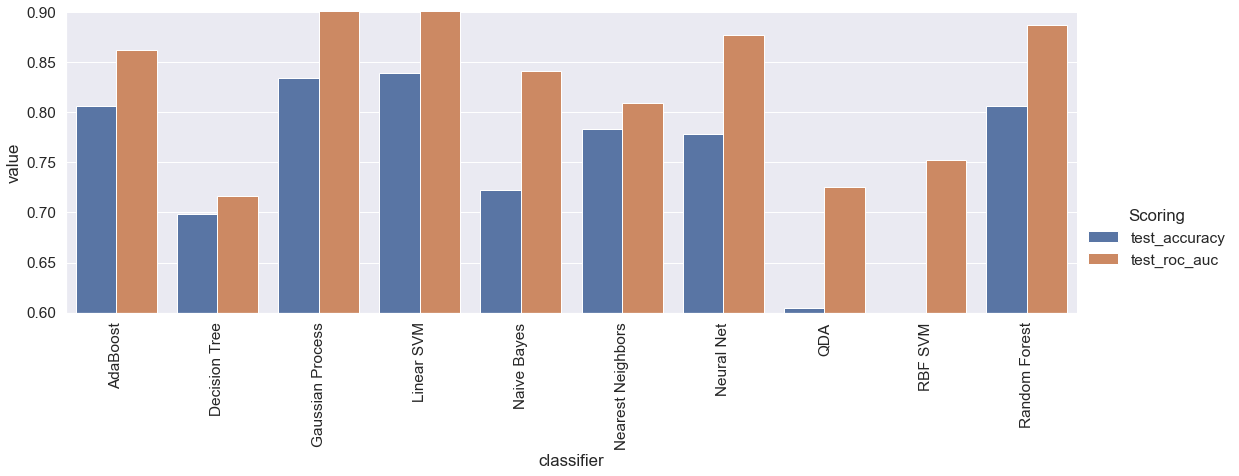

In [80]:
# machine learning

from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    #SVC(gamma=32768, C=0.000015),  # gamma and C values should be selected after selecting the best model as I have written. I did not run this because I wondered it takes too long 
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

scoring = ['accuracy','roc_auc']
data=[]
for name, clf in zip(names, classifiers):
    pipeline = make_pipeline(StandardScaler(), clf)

    cv_results = cross_validate(pipeline,X_train, y_train,
                                scoring=scoring,cv=5,n_jobs=-1)
    tmp_df=pd.DataFrame(cv_results)
    tmp_df['classifier']=name
    data.append(tmp_df)
data=pd.concat(data)
data=data.groupby('classifier').mean().reset_index()
data.drop(columns=['fit_time','score_time'],inplace=True)
data=data.melt(id_vars=['classifier'],var_name='Scoring')

sns.set(font_scale = 1.4)
g = sns.catplot(data=data,
                x="classifier", y="value",hue="Scoring",kind="bar", height=5, aspect=3)
g.set_xticklabels(rotation=90)
g.set(ylim=(0.6, 0.9))

### 4) Support Vector Machine (SVC), Tuning for "Linear" Model

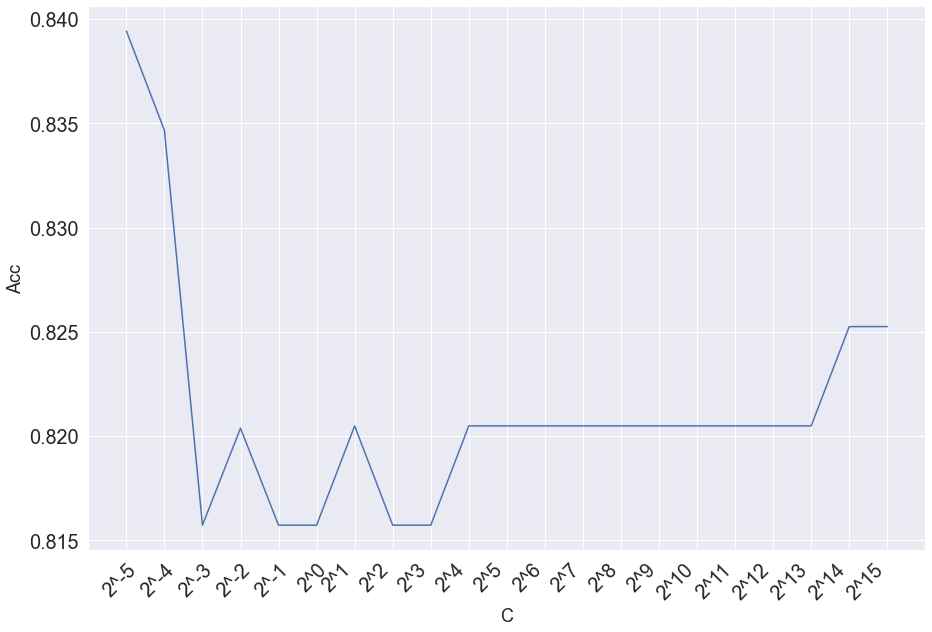

In [71]:
C=[]
X=[]
scoring = ['accuracy','roc_auc']
accu_linear=[]
for i in range(0,21):
    c = 2**(i-5)
    f=('2^{}'.format(i-5))
    C.append(c)
    X.append(f)
    clf = SVC(kernel="linear", C=c)
    pipeline = make_pipeline(StandardScaler(), clf)
    cv_results = cross_validate(pipeline, X_train, y_train,
                                scoring=scoring,cv=5,n_jobs=-1)
    mean_linear = cv_results.get('test_accuracy').mean()
    accu_linear.append(mean_linear)

X=X
fig, ax = plt.subplots(figsize=(15,10))

plt.xlabel("C", fontsize = 18) 
plt.ylabel("Acc", fontsize = 18)
 
# Rotate the X labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.plot(X, accu_linear)
    



### 5) Support Vector Machine (SVC), Tuning for "RBF" Model

In [95]:
Gamma = []
C=[]
scoring = ['accuracy','roc_auc']
accu=[]
data_matrix = np.zeros((11,10),dtype=float)
for i in range(11):
    c = 2**(2*i-5)
    C.append(c)
    for j in range(10):
        g = 2**(2*-j+3)
        Gamma.append(g)
        clf = SVC(kernel="rbf", C=c, gamma = g)
        pipeline = make_pipeline(StandardScaler(), clf)
        cv_results = cross_validate(pipeline, X_train, y_train,
                                scoring=scoring,cv=5,n_jobs=-1)
        mean = cv_results.get('test_accuracy').mean()
        accu.append(mean)
        data_matrix[i,j]= mean
    

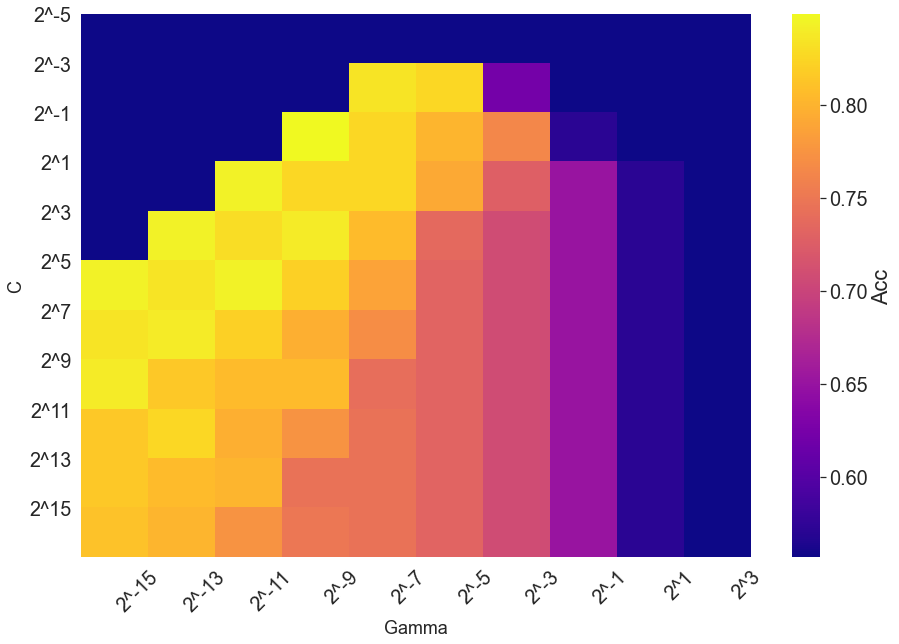

In [96]:
import matplotlib.pyplot as plt
Y =['2^-5','2^-3','2^-1','2^1','2^3','2^5','2^7','2^9','2^11','2^13','2^15']
X =['2^3','2^1','2^-1','2^-3','2^-5','2^-7','2^-9','2^-11','2^-13','2^-15','']

fig, ax = plt.subplots(figsize=(15,10))
sns.set(font_scale=1.8)
im = sns.heatmap(data_matrix,cmap='plasma',cbar_kws={'label': 'Acc'})
#ax = plt.imshow(data_matrix, center=0 cmap='inferno')
# We want to show all ticks...
ax.set_xticks(np.arange(len(X)))
ax.set_yticks(np.arange(len(Y)))
ax.invert_xaxis()
# ... and label them with the respective list entries
ax.set_xticklabels(X)
ax.set_yticklabels(Y)
plt.xlabel("Gamma", fontsize = 18) 
plt.ylabel("C", fontsize = 18)
 
# Rotate the X labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
         rotation_mode="anchor")


plt.show()

### 6) Choose the Best SVC_RBF Model

In [74]:
Gamma = []
C=[]
df = []
scoring = ['accuracy','roc_auc']
accu=[]
data_matrix = np.zeros((21,20),dtype=float)
for i in range(21):
    c = 2**(i-5)
    C.append(c)
    better=0
    for j in range(20):
        g = 2**(-j+3)
        Gamma.append(g)
        
        clf = SVC(kernel="rbf", C=c, gamma = g)
        pipeline = make_pipeline(StandardScaler(), clf)
        cv_results = cross_validate(pipeline, X_train, y_train,
                                scoring=scoring,cv=5,n_jobs=-1)
        mean = cv_results.get('test_accuracy').mean()
        accu.append(mean)
        #data_matrix[i,j]= mean
        df = pd.DataFrame(accu, columns = ['accuracy'])
        df['C'] = c
        df['gamma'] = g
print(df)
print('\n'"*** The Best SVC_RBF Model ***"'\n''\n',df[df.accuracy == df.accuracy.max()])

     accuracy      C     gamma
0    0.556589  32768  0.000015
1    0.556589  32768  0.000015
2    0.556589  32768  0.000015
3    0.556589  32768  0.000015
4    0.556589  32768  0.000015
..        ...    ...       ...
415  0.801772  32768  0.000015
416  0.801772  32768  0.000015
417  0.811074  32768  0.000015
418  0.811074  32768  0.000015
419  0.815725  32768  0.000015

[420 rows x 3 columns]

*** The Best SVC_RBF Model ***

     accuracy      C     gamma
92  0.848948  32768  0.000015
